In [1]:
!wget -O dog-cat-dataset.zip https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip
!unzip dog-cat-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4382.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4385.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4386.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4388.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4389.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4391.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4392.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4393.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4394.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4395.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4397.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4398.jpg  
  inflating: dog-cat-full-dataset-master/data/train/dogs/dog.4399.jpg  
  inflating: 

In [9]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_gen = datagen.flow_from_directory('/content/dog-cat-full-dataset-master/data/train',
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training')

val_gen = datagen.flow_from_directory('/content/dog-cat-full-dataset-master/data/train',
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='validation')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [16]:
# model = Sequential([
#   Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),
#   MaxPooling2D(2),
#   BatchNormalization(),
#   Dropout(0.2),
#   Conv2D(64, 3, activation='relu'),
#   MaxPooling2D(2),
#   BatchNormalization(),
#   Dropout(0.5),
#   Conv2D(128, 3, activation='relu'),
#   MaxPooling2D(2),
#   BatchNormalization(),
#   Dropout(0.5),
#   Flatten(),
#   Dropout(0.5),
#   Dense(512, activation='relu'),
#   Dense(1,activation='sigmoid')
# ])

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [26]:
base_model = VGG16(include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 74, 74, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)       

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
500/500 [==============================] - 175s 340ms/step - loss: 0.3668 - accuracy: 0.8401 - val_loss: 0.2913 - val_accuracy: 0.8698
Epoch 2/10
500/500 [==============================] - 167s 333ms/step - loss: 0.2965 - accuracy: 0.8688 - val_loss: 0.2597 - val_accuracy: 0.8863
Epoch 3/10
500/500 [==============================] - 174s 348ms/step - loss: 0.2696 - accuracy: 0.8823 - val_loss: 0.2648 - val_accuracy: 0.8795
Epoch 4/10
500/500 [==============================] - 165s 331ms/step - loss: 0.2591 - accuracy: 0.8873 - val_loss: 0.2526 - val_accuracy: 0.8953
Epoch 5/10
500/500 [==============================] - 165s 329ms/step - loss: 0.2507 - accuracy: 0.8907 - val_loss: 0.2427 - val_accuracy: 0.8953
Epoch 6/10
500/500 [==============================] - 166s 331ms/step - loss: 0.2390 - accuracy: 0.8980 - val_loss: 0.2297 - val_accuracy: 0.9032
Epoch 7/10
500/500 [==============================] - 165s 329ms/step - loss: 0.2379 - accuracy: 0.8973 - val_loss: 0.2284 -

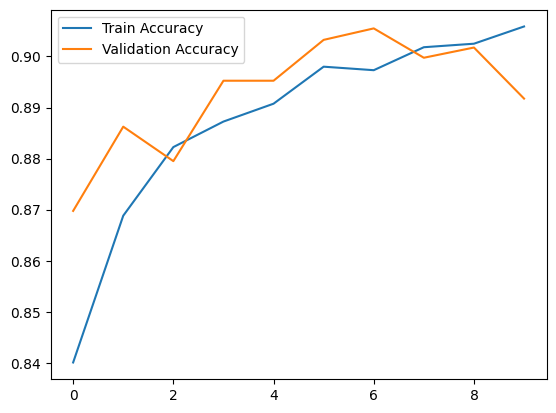

In [29]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

125/125 [==============================] - 32s 253ms/step


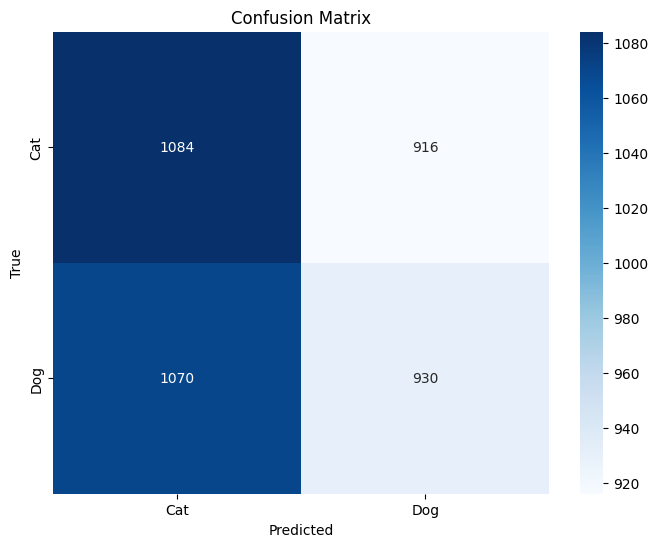

              precision    recall  f1-score   support

         Cat       0.50      0.54      0.52      2000
         Dog       0.50      0.47      0.48      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [30]:
Y_pred = model.predict(val_gen)
y_pred = (Y_pred > 0.5).astype(int).ravel()

y_true = val_gen.classes

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

In [31]:
model.save("ModelVGG Cat vs Dog.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model.save('ModelVGG Cat vs Dog.tflite')

In [33]:
model.save('ModelVGG Cat vs Dog.keras')